In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [26]:
book = pd.read_csv('book.csv')

In [27]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [28]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Model 1

In [29]:
frequent_item1 = apriori(book, min_support = 0.1, use_colnames = True)
frequent_item1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [30]:
Rule1 = association_rules(frequent_item1, min_threshold = 0.3)
Rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
84,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
85,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
86,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
87,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


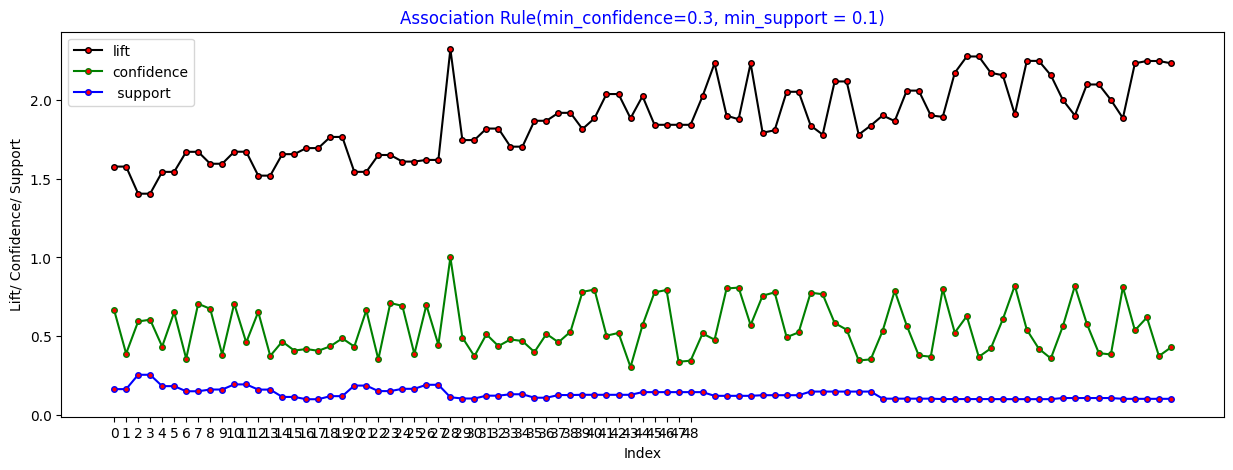

In [31]:
plt.figure(figsize=(15,5))
plt.plot(Rule1["lift"],c='k',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="lift")
plt.plot(Rule1["confidence"],c='g',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="confidence")
plt.plot(Rule1["support"],c='b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label=" support")
plt.xticks(range(0,49))
plt.xlabel("Index")
plt.ylabel("Lift/ Confidence/ Support")
plt.title("Association Rule(min_confidence=0.3, min_support = 0.1)",c='b')
plt.legend()
plt.show()

# Model 2

In [32]:
frequent_item2 = apriori(book, min_support = 0.15, use_colnames = True)
frequent_item2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [39]:
Rule2 = association_rules(frequent_item2, min_threshold = 0.2) 
Rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


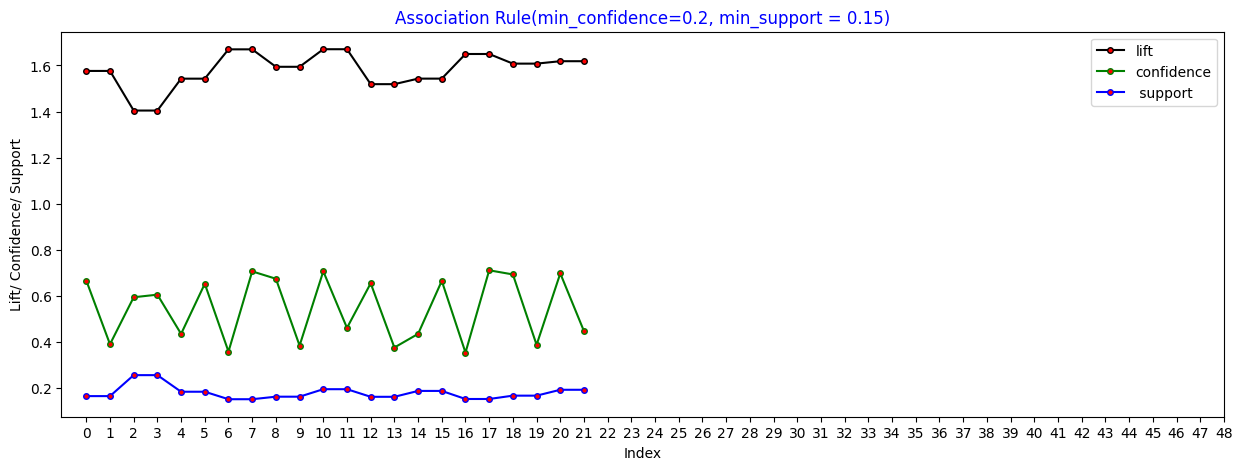

In [40]:
plt.figure(figsize=(15,5))
plt.plot(Rule2["lift"],c='k',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="lift")
plt.plot(Rule2["confidence"],c='g',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="confidence")
plt.plot(Rule2["support"],c='b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label=" support")
plt.xticks(range(0,49))
plt.xlabel("Index")
plt.ylabel("Lift/ Confidence/ Support")
plt.title("Association Rule(min_confidence=0.2, min_support = 0.15)",c='b')
plt.legend()
plt.show()

# Model 3

In [42]:
frequent_item3 = apriori(book, min_support = 0.18, use_colnames = True)
frequent_item3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"
8,0.1840,"(ChildBks, DoItYBks)"
9,0.1950,"(GeogBks, ChildBks)"


In [43]:
Rule3 = association_rules(frequent_item3, min_threshold = 0.5) 
Rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
5,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


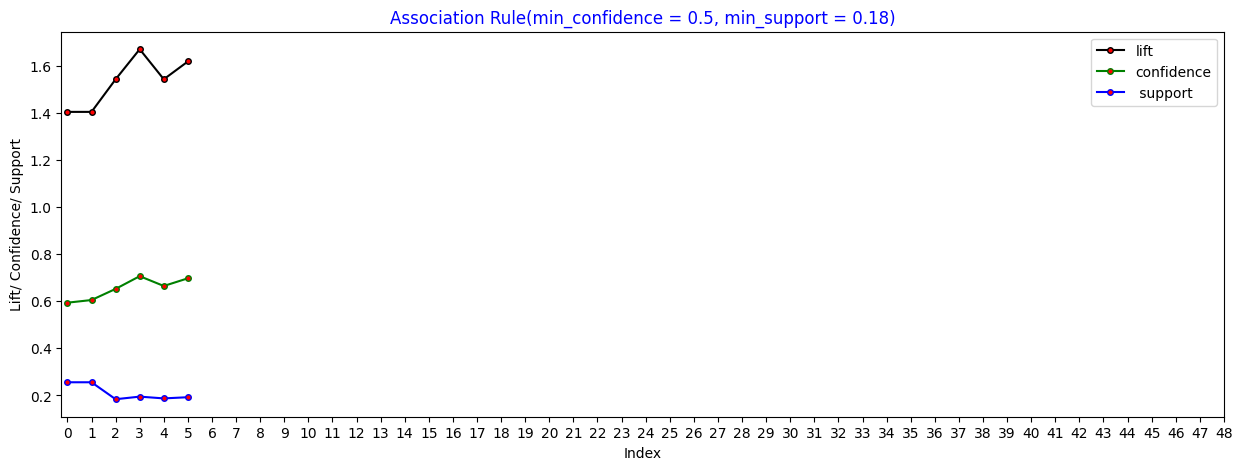

In [46]:
plt.figure(figsize=(15,5))
plt.plot(Rule3["lift"],c='k',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="lift")
plt.plot(Rule3["confidence"],c='g',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="confidence")
plt.plot(Rule3["support"],c='b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label=" support")
plt.xticks(range(0,49))
plt.xlabel("Index")
plt.ylabel("Lift/ Confidence/ Support")
plt.title("Association Rule(min_confidence = 0.5, min_support = 0.18)",c='b')
plt.legend()
plt.show()